## Описание алгоритма стохастического градиентного спуска с оптимизатором RMSProp

Данный код реализует алгоритм стохастического градиентного спуска (SGD) с использованием мини-батчей и оптимизатора RMSProp для поиска вектора параметров $w = [w_0, w_1, w_2]^T$, который определяет разделяющую линию $w_1 \cdot x_1 + w_2 \cdot x_2 + w_0 = 0$.

**Цель:** Найти вектор параметров $w$, минимизирующий усеченный эмпирический риск $Q_k(w)$, основанный на логарифмической функции потерь.

**Усеченный эмпирический риск:**

$$Q_k(w) = \frac{1}{K} \sum_{i=k}^{k+K-1} L_i(w)$$

где:
- $k$ - случайно выбранный начальный индекс мини-батча.
- $K$ (`batch_size` в коде) - размер мини-батча.
- $L_i(w)$ - логарифмическая функция потерь для i-го наблюдения в мини-батче.

**Логарифмическая функция потерь:**

Функция потерь для одного наблюдения $L_i(w)$ определяется как:

$$L_i(w) = \log_2(1 + e^{-M_i}) = \log_2(1 + e^{-w^T \cdot x_i \cdot y_i})$$

где:
- $x_i$ - вектор признаков для i-го наблюдения (с добавленной единицей для смещения $w_0$).
- $y_i$ - истинная метка класса для i-го наблюдения (-1 или 1).
- $M_i = w^T \cdot x_i \cdot y_i$ - "маржа" классификации.

**Производная логарифмической функции потерь:**

Производная логарифмической функции потерь по вектору параметров $w$ для i-го наблюдения равна:

$$\frac{\partial L_i(w)}{\partial w} = -\frac{e^{-w^T \cdot x_i \cdot y_i} \cdot x_i^T \cdot y_i}{(1 + e^{-w^T \cdot x_i \cdot y_i}) \cdot \ln(2)}$$

**Алгоритм стохастического градиентного спуска с оптимизатором RMSProp:**

RMSProp (Root Mean Square Propagation) - это алгоритм оптимизации, который адаптирует скорость обучения для каждого параметра. Он использует скользящее среднее квадратов градиентов, чтобы нормализовать шаг обновления.

Правила обновления для скользящего среднего квадратов градиентов $G$ и вектора параметров $w$:

1.  Обновление скользящего среднего квадратов градиентов:
    $$G = \alpha \cdot G + (1-\alpha) \cdot \left(\frac{\partial Q_k(w)}{\partial w}\right)^2$$
    (Операция возведения в квадрат здесь поэлементная).
2.  Обновление вектора параметров:
    $$w_n = w_{n-1} - \eta \odot \frac{\partial Q_k(w) / \partial w}{\sqrt{G} + \epsilon}$$
    (Операции деления и взятия квадратного корня здесь поэлементные, $\odot$ обозначает поэлементное умножение).

где:
- $w_n$ - вектор параметров на текущей итерации.
- $w_{n-1}$ - вектор параметров на предыдущей итерации.
- $G$ - вектор скользящего среднего квадратов градиентов (инициализируется нулями).
- $\alpha$ - коэффициент сглаживания для скользящего среднего квадратов градиентов.
- $\eta$ - шаг обучения (может быть общим или разным для каждого параметра).
- $\frac{\partial Q_k(w)}{\partial w}$ - градиент усеченного эмпирического риска по вектору параметров $w$ для текущего мини-батча.
- $\epsilon$ (малое число, например, $10^{-8}$) - добавляется для предотвращения деления на ноль.

**Градиент усеченного эмпирического риска:**

Градиент усеченного эмпирического риска по вектору параметров $w$ для мини-батча вычисляется как среднее градиентов логарифмической функции потерь для каждого наблюдения в мини-батче:

$$\frac{\partial Q_k(w)}{\partial w} = \frac{1}{K} \sum_{i=k}^{k+K-1} \frac{\partial L_i(w)}{\partial w}$$

где $\frac{\partial L_i(w)}{\partial w}$ - производная логарифмической функции потерь для i-го наблюдения.

**Матрица признаков X:**

Матрица признаков $X$ для всей выборки формируется таким образом, что каждая строка соответствует одной точке данных $(x_1, x_2)$. Столбцы матрицы содержат значения признаков для каждой точки, а именно:

- Первый столбец: константа 1 (для члена $w_0$)
- Второй столбец: значение $x_1$
- Третий столбец: значение $x_2$

Таким образом, матрица $X$ имеет размерность $n \times 3$, где $n$ - количество точек в выборке.

**Скользящее среднее ошибки:**

Для отслеживания сходимости в процессе обучения используется экспоненциальное скользящее среднее ошибки. На каждой итерации, после вычисления ошибки $Q_k$ для текущего случайно выбранного мини-батча, скользящее среднее $Qe$ обновляется по формуле:

$$Qe = \lambda \cdot Q_k(w) + (1 - \lambda) \cdot Qe$$

где:
- $Qe$ - текущее значение скользящего среднего ошибки.
- $Q_k(w)$ - ошибка на текущем мини-батче.
- $\lambda$ (`lm` в коде) - параметр сглаживания.

**Реализация в коде (общие моменты):**

В коде для реализации этого алгоритма необходимо будет:

1.  Определить логарифмическую функцию потерь `loss` и функцию для вычисления ее градиента по мини-батчу `df`.
2.  Подготовить данные `data_x` и `data_y` и сформировать матрицу признаков `x_train` и вектор меток `y_train`.
3.  Инициализировать параметры $w$, шаги обучения $\eta$, параметры `N` (число итераций), `lm` (параметр сглаживания для Qe), `batch_size` (размер мини-батча), `alpha` (коэффициент сглаживания для G), и `eps` (малое число для RMSProp).
4.  Инициализировать вектор $G$ для RMSProp нулями и начальное значение скользящего среднего ошибки $Qe$.
5.  В цикле, выполняющем `N` итераций:
    - Случайно выбрать начальный индекс `k` для мини-батча (`k = np.random.randint(0, n_train - batch_size)`).
    - Извлечь мини-батчи признаков (`x_batch`) и меток (`y_batch`).
    - Вычислить градиент по мини-батчу (`gradient_batch`) с помощью функции `df`.
    - Вычислить ошибку на текущем мини-батче (`Qk`) и обновить скользящее среднее ошибки (`Qe`).
    - Обновить вектор $G$ для RMSProp по формуле: $G = alpha \cdot G + (1 - alpha) \cdot gradient\_batch^2$.
    - Обновить вектор параметров $w$ по формуле RMSProp: $w = w - \eta \odot (gradient\_batch / (\sqrt{G} + eps))$.
6.  После завершения итераций:
    - Вычислить "маржу" классификации `margin` для всех тренировочных данных.
    - Вычислить итоговое значение среднего эмпирического риска для всей выборки (хотя в коде вычисляется доля точек с отрицательной маржой `Q = np.mean(margin < 0)`).
    - Вывести результаты.

Q = 0.06
Qe = 0.7174181377501041


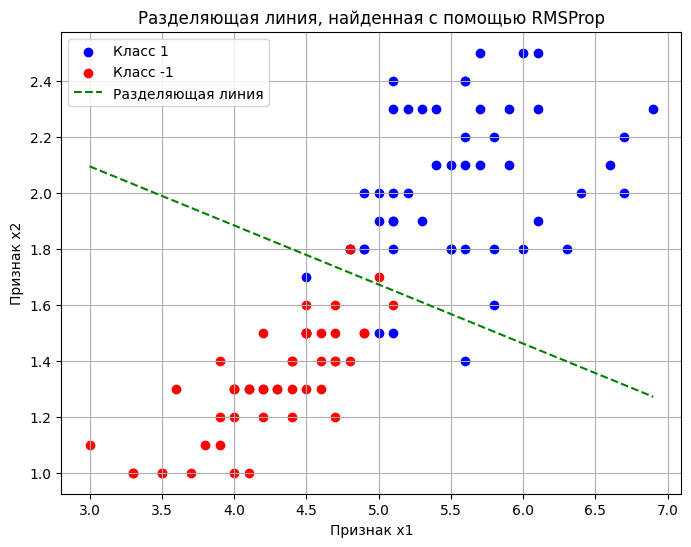

In [1]:
import numpy as np
import matplotlib.pyplot as plt # Добавлен импорт


# логарифмическая функция потерь
def loss(w, X, y):
    M = (X @ w) * y
    return np.log2(1 + np.exp(-M))



batch_size = 10 # размер мини-батча (величина K = 10)

def df(w, X, y):
    M = (X @ w) * y               # (10,1)
    num = np.exp(-M)              # (10,1)
    denom = (1 + np.exp(-M)) * np.log(2)  # (10,1)
    coeff = -(num / denom) * y    # (10,1)
    grad = X.T @ coeff            # (3,1)
    return grad / batch_size


data_x = [(5.3, 2.3), (5.7, 2.5), (4.0, 1.0), (5.6, 2.4), (4.5, 1.5), (5.4, 2.3), (4.8, 1.8), (4.5, 1.5), (5.1, 1.5), (6.1, 2.3), (5.1, 1.9), (4.0, 1.2), (5.2, 2.0), (3.9, 1.4), (4.2, 1.2), (4.7, 1.5), (4.8, 1.8), (3.6, 1.3), (4.6, 1.4), (4.5, 1.7), (3.0, 1.1), (4.3, 1.3), (4.5, 1.3), (5.5, 2.1), (3.5, 1.0), (5.6, 2.2), (4.2, 1.5), (5.8, 1.8), (5.5, 1.8), (5.7, 2.3), (6.4, 2.0), (5.0, 1.7), (6.7, 2.0), (4.0, 1.3), (4.4, 1.4), (4.5, 1.5), (5.6, 2.4), (5.8, 1.6), (4.6, 1.3), (4.1, 1.3), (5.1, 2.3), (5.2, 2.3), (5.6, 1.4), (5.1, 1.8), (4.9, 1.5), (6.7, 2.2), (4.4, 1.3), (3.9, 1.1), (6.3, 1.8), (6.0, 1.8), (4.5, 1.6), (6.6, 2.1), (4.1, 1.3), (4.5, 1.5), (6.1, 2.5), (4.1, 1.0), (4.4, 1.2), (5.4, 2.1), (5.0, 1.5), (5.0, 2.0), (4.9, 1.5), (5.9, 2.1), (4.3, 1.3), (4.0, 1.3), (4.9, 2.0), (4.9, 1.8), (4.0, 1.3), (5.5, 1.8), (3.7, 1.0), (6.9, 2.3), (5.7, 2.1), (5.3, 1.9), (4.4, 1.4), (5.6, 1.8), (3.3, 1.0), (4.8, 1.8), (6.0, 2.5), (5.9, 2.3), (4.9, 1.8), (3.3, 1.0), (3.9, 1.2), (5.6, 2.1), (5.8, 2.2), (3.8, 1.1), (3.5, 1.0), (4.5, 1.5), (5.1, 1.9), (4.7, 1.4), (5.1, 1.6), (5.1, 2.0), (4.8, 1.4), (5.0, 1.9), (5.1, 2.4), (4.6, 1.5), (6.1, 1.9), (4.7, 1.6), (4.7, 1.4), (4.7, 1.2), (4.2, 1.3), (4.2, 1.3)]
data_y = [1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1]

x_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y).reshape(-1,1)

n_train = len(x_train)  # размер обучающей выборки
w = np.array([0.0, 0.0, 0.0]).reshape(-1,1)  # начальные весовые коэффициенты
nt = np.array([0.1, 0.05, 0.05]).reshape(-1,1)  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 200  # число итераций алгоритма SGD

alpha = 0.7 # параметр для RMSProp
G = np.zeros(len(w)).reshape(-1,1)  # параметр для RMSProp
eps = 0.01 # параметр для RMSProp

# здесь продолжайте программу
Qe = np.mean(loss(w,x_train,y_train))# начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел
# здесь продолжайте программу
for _ in range(N):
  k = np.random.randint(0,n_train - batch_size)
  x_batch = x_train[k: k+batch_size]
  y_batch = y_train[k: k+batch_size]
  Qk = np.mean(loss(w,x_batch,y_batch))
  Qe = lm * Qk + (1 - lm) * Qe

  G = alpha * G + (1 - alpha) * (df(w,x_batch,y_batch)*df(w,x_batch,y_batch))
  w = w - nt * ( df(w,x_batch,y_batch) / (np.sqrt(G) + eps) )

margin = x_train @ w * y_train

Q = np.mean(margin < 0)

print(f"Q = {Q}")
print(f"Qe = {Qe}")

# Код для отображения финального графика (упрощенный)
plt.figure(figsize=(8, 6))
line_x = [min(x_train[:, 1]), max(x_train[:, 1])]
line_y = [- w[0] / w[2] - w[1] * x / w[2] for x in line_x]
x_0 = x_train[y_train.flatten() == 1]  # формирование точек для 1-го
x_1 = x_train[y_train.flatten() == -1]  # и 2-го классов
plt.scatter(x_0[:, 1], x_0[:, 2], color='blue', label='Класс 1') # Изменено на blue для согласованности с предыдущим графиком
plt.scatter(x_1[:, 1], x_1[:, 2], color='red', label='Класс -1') # Изменено на red для согласованности с предыдущим графиком
plt.plot(line_x, line_y, color='green', linestyle='--', label='Разделяющая линия')
plt.xlabel('Признак x1')
plt.ylabel('Признак x2')
plt.title('Разделяющая линия, найденная с помощью RMSProp')
plt.legend()
plt.grid(True)
plt.show()